In [2]:
import os
import glob
import pandas as pd
import numpy as np
import logging
#import esmvalcore.preprocessor
import xarray as xr
from xmip.preprocessing import rename_cmip6
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cftime
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings('ignore')

In [3]:
Rho_s = 1769.0 #kgm-3, Mann et al., 2010
modes = ['Nucleation', 'Aitken', 'Accumulation', 'Course']

sigma = {'Nucleation':1.59,
         'Aitken':1.59,
         'Accumulation':1.4,
         'Course':2} # Walters et al. 2019, table 4

avgdro = 6.022E23
molar_mass_air = 0.0289647 # kg/mol
molecules_air_per_kg = avgdro/molar_mass_air

In [4]:
def get_ds(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    return ds


def get_ds_ts(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    ds = ds.sel(time='2036')
    ds = ds.mean('longitude')
    weights = np.cos(np.deg2rad(ds['latitude']))
    ds = ds.weighted(weights).mean('latitude')
    return ds


In [5]:
run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2]
            }

In [6]:
"""
run = 'u-de012/'
dir = '/gws/nopw/j04/moghli/postprocessed_ncs/{}/burdens_3d_with_modes/'.format(run)
file = 'RadFluxes_2036_12_u-de012.nc'
#file = 'RadFluxes_2036_8_u-de012.nc'
#file = 'RadFluxes_2036_4_u-de012.nc'
ds = xr.open_dataset(dir+file).mean('longitude')
"""

"\nrun = 'u-de012/'\ndir = '/gws/nopw/j04/moghli/postprocessed_ncs/{}/burdens_3d_with_modes/'.format(run)\nfile = 'RadFluxes_2036_12_u-de012.nc'\n#file = 'RadFluxes_2036_8_u-de012.nc'\n#file = 'RadFluxes_2036_4_u-de012.nc'\nds = xr.open_dataset(dir+file).mean('longitude')\n"

In [7]:
#runs = ['u-de567', 'u-de050', 'u-de457', 'u-de349'] # slow so only postprocessed a few

#ds = get_ds('u-de050', 'burdens_3d_with_modes')

## slowish - ~ 20 secs per run, 15 mins total
ds_list = []
run_list = []
for run in run_dict.keys():
    print(run)
    run_list.append(run)
    ds = get_ds(run, 'burdens_3d_with_modes')
    ds['injection_latitude'] = run_dict[run][0]
    ds['injection_altitude'] = run_dict[run][1]
    ds_list.append(ds.sel(time='2036').mean(dim=['longitude', 'time']))
ds_dict = dict(zip(run_list, ds_list))

u-dg683
u-df777
u-de348
u-de517
u-de349
u-de350
u-de365
u-de110
u-de636
u-de111
u-de505
u-de145
u-de187
u-de369
u-dd987
u-de593
u-dd989
u-de506
u-de012
u-de013
u-de399
u-de018
u-de567
u-de026
u-de633
u-de050
u-de052
u-de457
u-dg027
u-df710
u-dg309
u-dg028
u-dg549
u-dg552
u-dg655


In [8]:
ds = ds_list[0]

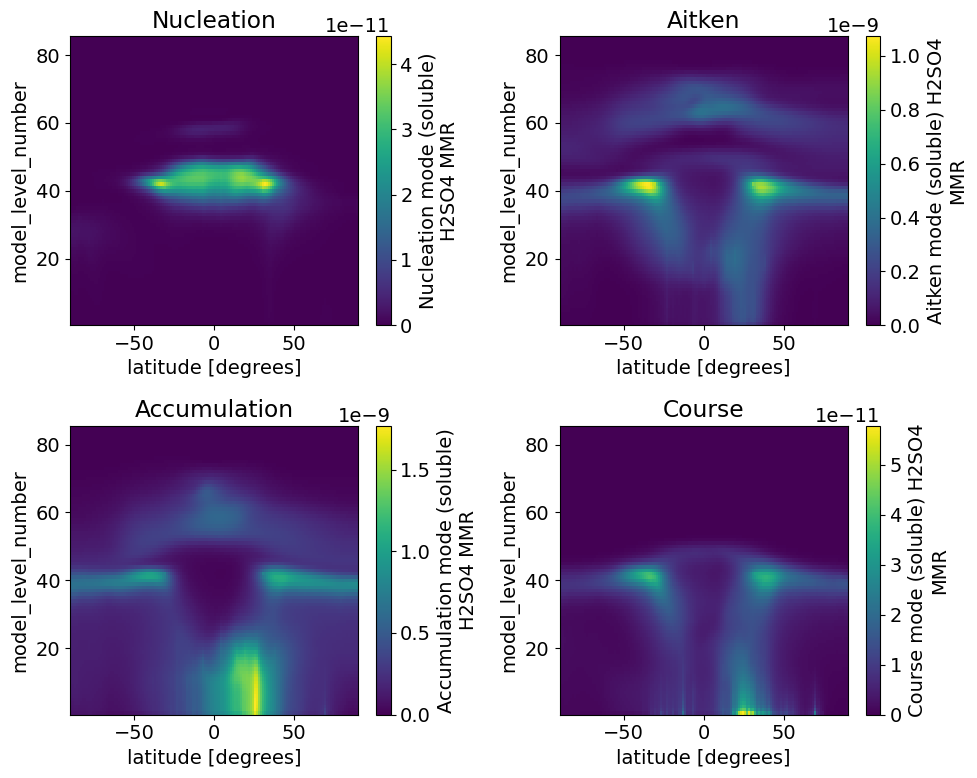

In [9]:

#ds['H2SO4 mass mixing ratio after tstep'].mean('longitude').plot()
i=0
fig, axs = plt.subplots(2,2, figsize=(10, 8))
for mode in modes:
    ax = axs.flatten()[i]
    #ds['{} mode (soluble) NUMBER'.format(mode)].mean('longitude').plot(ax=ax)
    ds['{} mode (soluble) H2SO4 MMR'.format(mode)].plot(ax=ax)
    ax.set_title(mode)
    i=i+1
plt.tight_layout()
plt.show()

In [10]:
def add_R_eff(ds):
    """ returns an xarray ds with the spatial and time resolved effective aerosol radius
    calculated as in Visioni 2023 https://acp.copernicus.org/articles/23/663/2023/acp-23-663-2023.html
    (their equations 1-3)
    """
       
    for mode in modes:
        # first get V_i by:
        # V_i = X_i/(Rho_s * N_i)
        # where:
        # X_i is MMR
        # Rho_s = 
        # N_i is number density in number per kg air. We have it as number per molecule air so need to convert
        ds['{} mode volume'.format(mode)] = (1/Rho_s)*ds['{} mode (soluble) H2SO4 MMR'.format(mode)]/(molecules_air_per_kg*ds['{} mode (soluble) NUMBER'.format(mode)])
        
        # second, get R_i by:
        # V_i = 4/3 pi R_i^3 * exp(9/2 * ln2(sigma_i))
        # sigma is the geometric standard deviation of the modes
        # V_i = c * R_i^3
        c = (4/3) * np.pi * np.exp((9/2)*(np.log(sigma[mode])**2))
        ds['{} mode radius'.format(mode)] = np.cbrt((1/c)*ds['{} mode volume'.format(mode)])
    
    a = (ds['Nucleation mode radius']**3)*(molecules_air_per_kg*ds['Nucleation mode (soluble) NUMBER']) + (ds['Aitken mode radius']**3)*(molecules_air_per_kg*ds['Aitken mode (soluble) NUMBER']) + (ds['Accumulation mode radius']**3)*(molecules_air_per_kg*ds['Accumulation mode (soluble) NUMBER']) + (ds['Course mode radius']**3)*(molecules_air_per_kg*ds['Course mode (soluble) NUMBER'])
    b = (ds['Nucleation mode radius']**2)*(molecules_air_per_kg*ds['Nucleation mode (soluble) NUMBER']) + (ds['Aitken mode radius']**2)*(molecules_air_per_kg*ds['Aitken mode (soluble) NUMBER']) + (ds['Accumulation mode radius']**2)*(molecules_air_per_kg*ds['Accumulation mode (soluble) NUMBER']) + (ds['Course mode radius']**2)*(molecules_air_per_kg*ds['Course mode (soluble) NUMBER'])
    ds['R_eff'] = a/b
    return ds


In [11]:
#

In [12]:
"""
fig, ax = plt.subplots()

cs=ax.contourf(ds.latitude.values, 0.001*ds.level_height.values, 1E9*ds['R_eff'].values,
                   levels = np.arange(0, 400, 50),
                   cmap='YlGnBu',
                   extend='max')
ax.set_ylim(0, 25)
ax.set_xlabel('Latitude')
ax.set_ylabel('Altitude (km)' )
cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')
cbar1.ax.tick_params(labelsize='small')
"""

"\nfig, ax = plt.subplots()\n\ncs=ax.contourf(ds.latitude.values, 0.001*ds.level_height.values, 1E9*ds['R_eff'].values,\n                   levels = np.arange(0, 400, 50),\n                   cmap='YlGnBu',\n                   extend='max')\nax.set_ylim(0, 25)\nax.set_xlabel('Latitude')\nax.set_ylabel('Altitude (km)' )\ncbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])\ncbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')\ncbar1.ax.tick_params(labelsize='small')\n"

In [16]:
"""
ds = add_R_eff(ds)
for mode in modes:
    print(1E9*ds['{} mode radius'.format(mode)].max().item())
"""

"\nds = add_R_eff(ds)\nfor mode in modes:\n    print(1E9*ds['{} mode radius'.format(mode)].max().item())\n"

Text(0.02, 0.5, 'Altitude (km)')

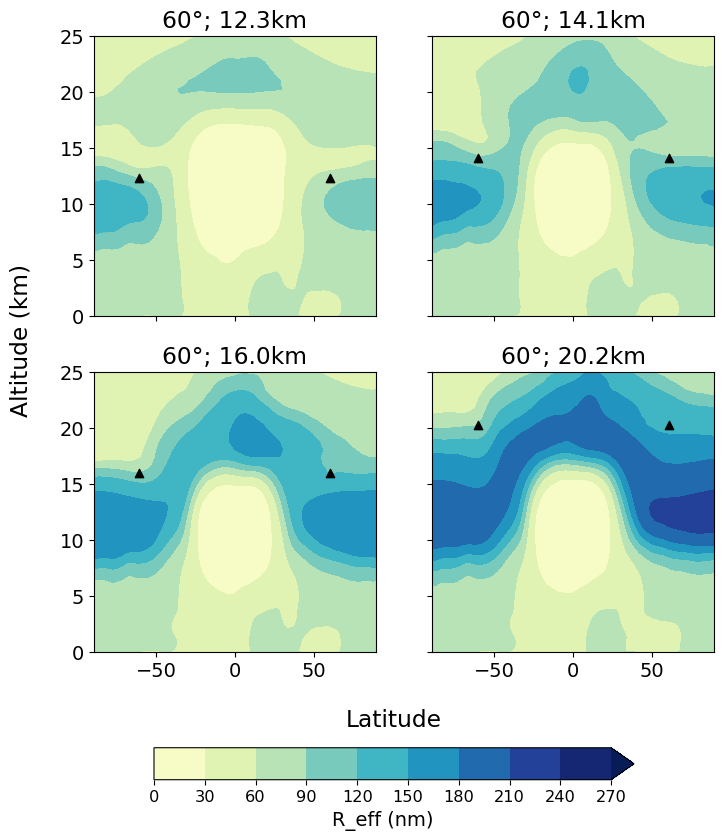

In [17]:
fig, axs = plt.subplots(2, 2, 
                        figsize= (8, 8),
                        sharex=True, sharey=True)

runs = ['u-de018', 'u-de026', 'u-de050', 'u-de457']

i=0
for run in runs:
    ds = add_R_eff(ds_dict[run])
    ax = axs.flatten()[i]
    cs=ax.contourf(ds.latitude.values, 0.001*ds.level_height.values, 1E9*ds['R_eff'].values,
                   levels = np.arange(0, 300, 30),
                   cmap='YlGnBu',
                   extend='max')
    ax.set_ylim(0, 25)
    lat, alt = str(int(ds.injection_latitude.values.item())), str(ds.injection_altitude.values.item())
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    title = lat + '°; ' + alt + 'km' 
    ax.set_title(title)
    i=i+1

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')
cbar1.ax.tick_params(labelsize='small')

fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)')

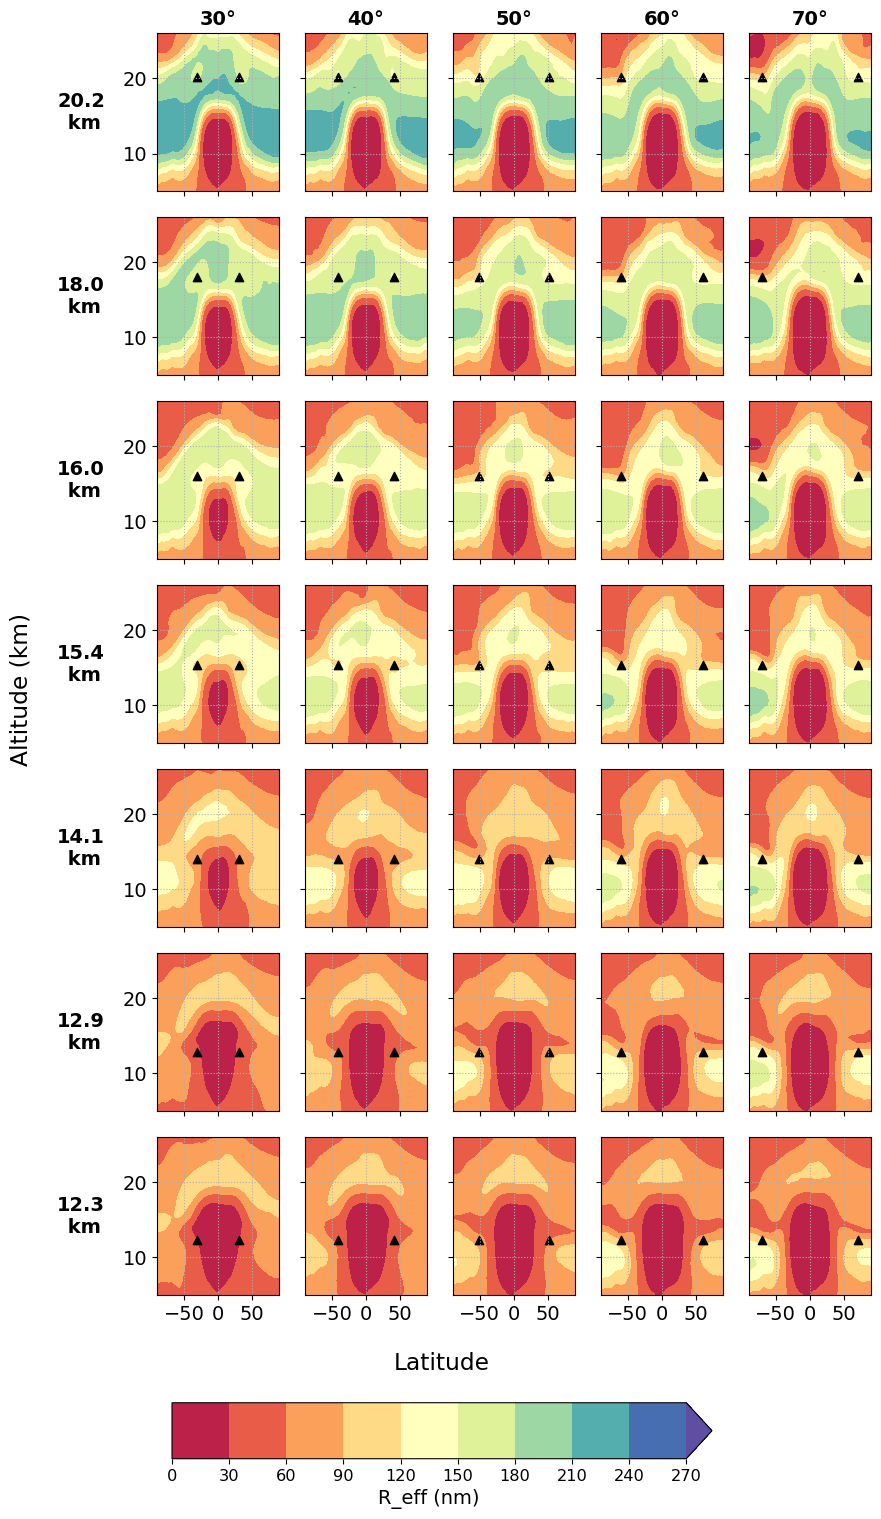

In [18]:
### repeat the above plot but for annual injection:
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(9, 14),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', 
                      rotation=0, labelpad = 30, weight='bold')
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), 
                     fontsize='medium', weight='bold')
    
    ds = add_R_eff(ds_dict[run])
    
    cs=ax.contourf(ds.latitude.values, 
                   0.001*ds.level_height.values, 
                   1E9*ds['R_eff'].values,
                   levels = np.arange(0, 300, 30),
                   cmap='Spectral',
                   extend='max')
    ax.set_ylim(5, 26)
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    ax.grid(ls='dotted')
    i=i+1
    
fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)' )

plt.tight_layout()

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')
cbar1.ax.tick_params(labelsize='small')
plt.savefig('Figures/Extra/R_eff_zonal_height_all.jpg', dpi=450, bbox_inches='tight')
plt.show()

In [19]:
background_dir = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/mmrso4/gn/latest/'
### SLOW.. 
ds_background_mmr = xr.open_mfdataset(background_dir+os.listdir(background_dir)[0]).mean('lon')
#ds_background_mmr = ds_background_mmr.groupby(ds_background_mmr.time.dt.year).mean()
ds_background_mmr =ds_background_mmr.resample(time="Y").mean().load()
ds_background_mmr_std = ds_background_mmr.mmrso4.std('time')
ds_background_mmr_mean = ds_background_mmr.mmrso4.mean('time')


ds_background_mmr_H2SO4_std = (ds_background_mmr_std*(1/0.9796)).rename({'lev':'model_level_number', 'lat':'latitude'})
ds_background_mmr_H2SO4_mean = (ds_background_mmr_mean*(1/0.9796)).rename({'lev':'model_level_number', 'lat':'latitude'})


In [ ]:
"""
total_mmr = (ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']).to_dataset(name='total_mmr')
masked_ds = total_mmr.where((total_mmr.total_mmr.values-ds_background_mmr_H2SO4_mean.values)>ds_background_mmr_H2SO4_std.values)
masked_ds.total_mmr.plot()
"""

In [ ]:
"""
ds = ds_dict['u-dg683']

total_mmr = (ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']).to_dataset(name='total_mmr')
masked_ds = total_mmr.where((total_mmr.total_mmr.values-ds_background_mmr_H2SO4_mean.values)>ds_background_mmr_H2SO4_std.values)

fig, ax = plt.subplots()
#vals = (ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']).values
cs=ax.contourf(masked_ds.latitude.values, 
               0.001*masked_ds.level_height.values, 
               masked_ds.total_mmr.values-ds_background_mmr_H2SO4_mean.values,
               #levels = np.arange(0, 300, 30),
               cmap='Spectral',
               extend='max')
ax.set_ylim(0, 25)
cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')
cbar1.ax.tick_params(labelsize='small')
"""

In [20]:
ds = ds_dict['u-dg683']
ds = add_R_eff(ds_dict[run])
ds['total_mmr'] = ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']
ds['total_mmr_anom'] = ds['total_mmr']
ds['total_mmr_anom'].values = ds['total_mmr'].values - ds_background_mmr_H2SO4_mean.values
ds['total_mmr_background_std'] = ds['total_mmr']
ds['total_mmr_background_std'].values = ds_background_mmr_H2SO4_std.values
masked_ds = ds.where(ds['total_mmr_anom'] > ds['total_mmr_background_std'])
#masked_ds

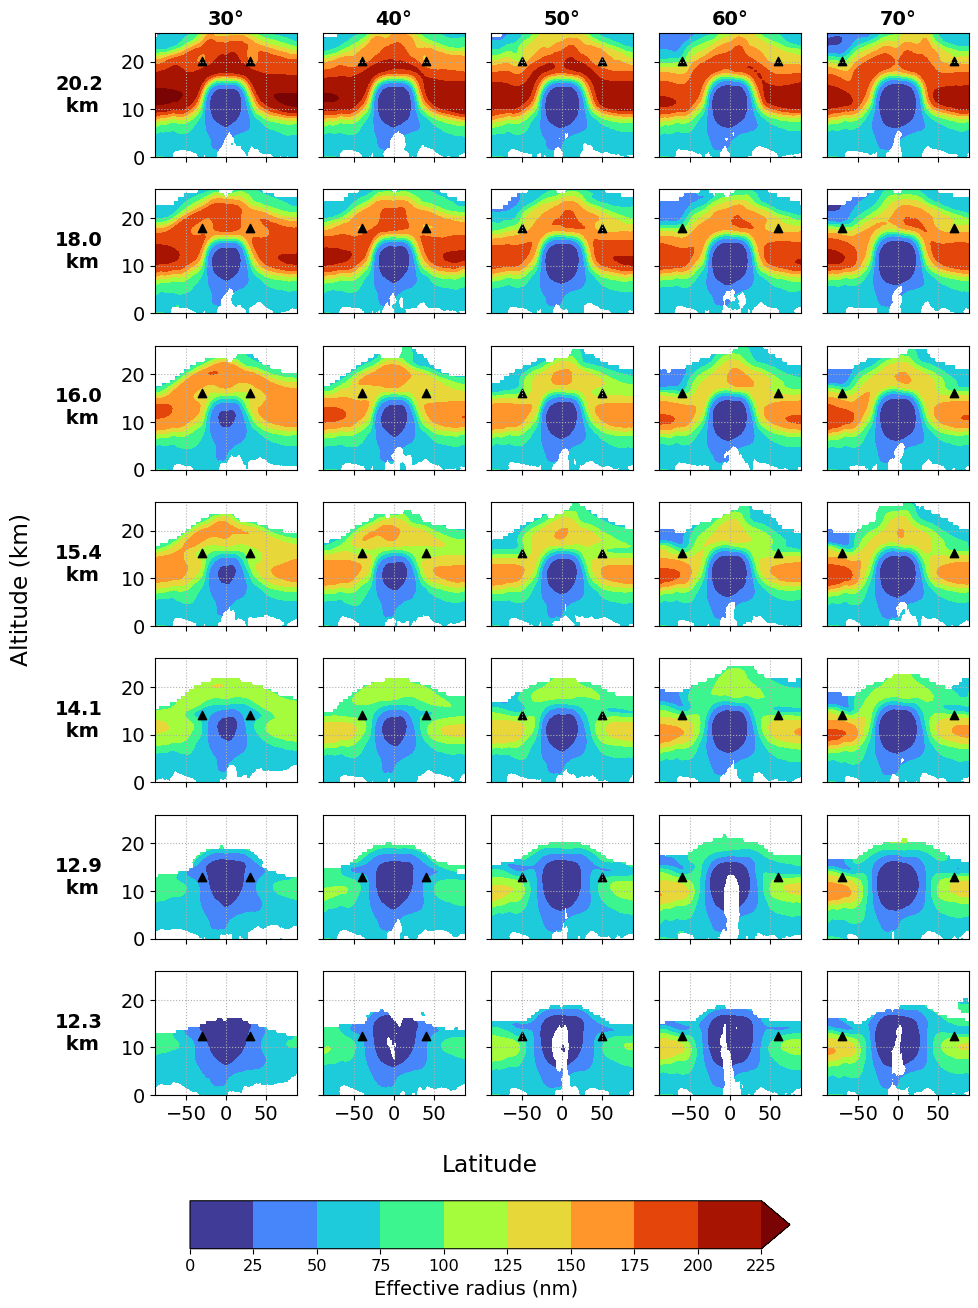

In [37]:
### repeat the above plot but for annual injection:
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(10, 12),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', 
                      rotation=0, labelpad = 30, weight='bold')
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), 
                     fontsize='medium', weight='bold')
    
    ds = add_R_eff(ds_dict[run])

    ds['total_mmr'] = ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']
    ds['total_mmr_anom'] = ds['total_mmr']
    ds['total_mmr_anom'].values = ds['total_mmr'].values - ds_background_mmr_H2SO4_mean.values
    ds['total_mmr_background_std'] = ds['total_mmr']
    ds['total_mmr_background_std'].values = ds_background_mmr_H2SO4_std.values
    masked_ds = ds.where(ds['total_mmr_anom'] > ds['total_mmr_background_std'])
        
    cs=ax.contourf(masked_ds.latitude.values, 
                   0.001*masked_ds.level_height.values, 
                   1E9*masked_ds['R_eff'].values,
                   levels = np.arange(0, 250, 25),
                   cmap='turbo',
                   extend='max')
    ax.set_ylim(0, 26)
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    ax.grid(ls='dotted')
    i=i+1
    
fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)' )

plt.tight_layout()

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='Effective radius (nm)')
cbar1.ax.tick_params(labelsize='small')
plt.savefig('Figures/Supp/R_eff_zonal_height_sigmask.jpg', dpi=450, bbox_inches='tight')
plt.show()

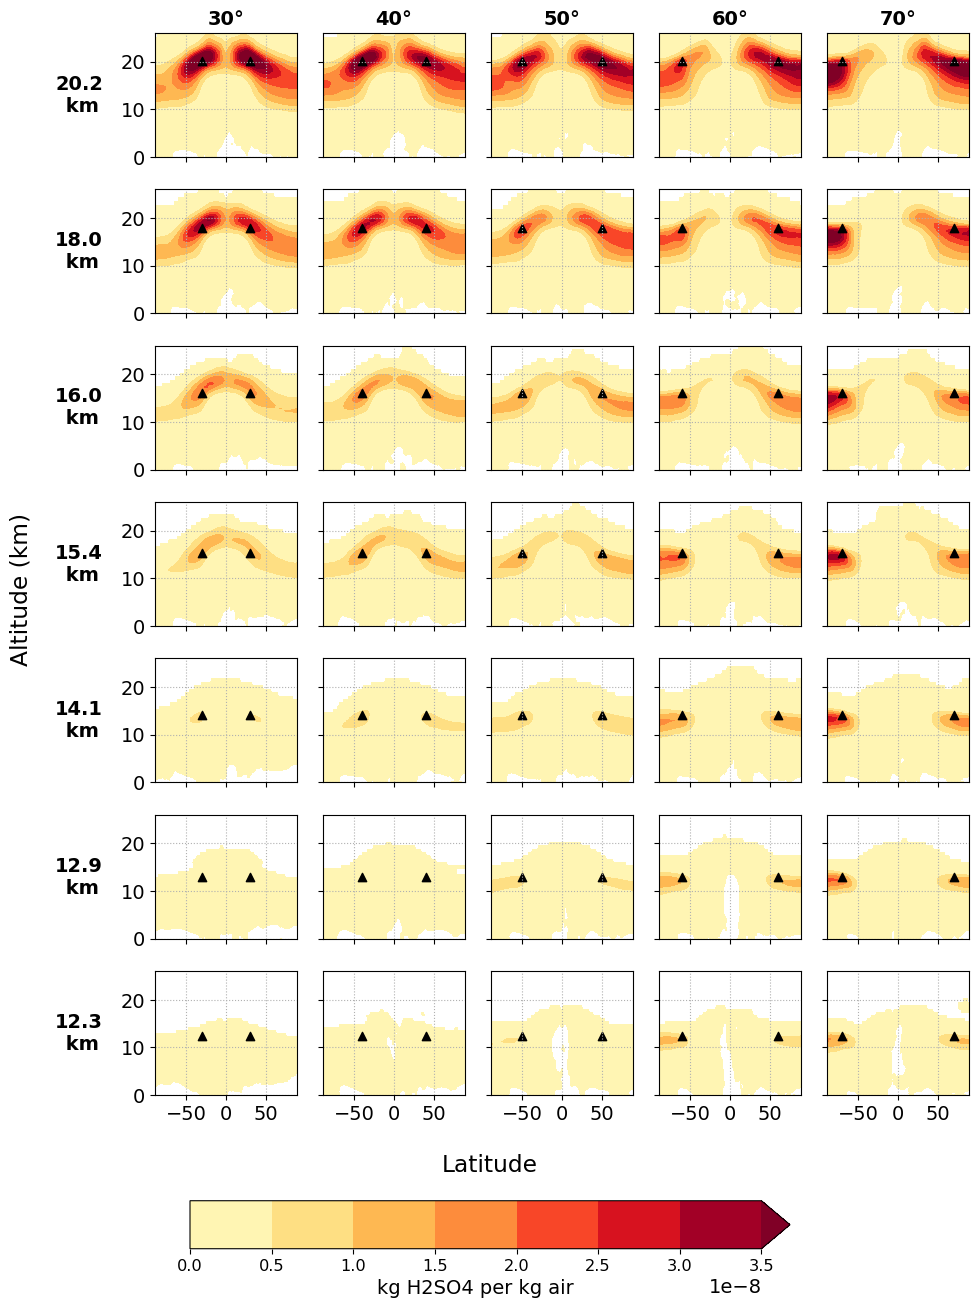

In [35]:
### repeat the above plot but for burden:
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(10, 12),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', 
                      rotation=0, labelpad = 30, weight='bold')
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), 
                     fontsize='medium', weight='bold')
    
    ds = add_R_eff(ds_dict[run])

    ds['total_mmr'] = ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']
    ds['total_mmr_anom'] = ds['total_mmr']
    ds['total_mmr_anom'].values = ds['total_mmr'].values - ds_background_mmr_H2SO4_mean.values
    ds['total_mmr_background_std'] = ds['total_mmr']
    ds['total_mmr_background_std'].values = ds_background_mmr_H2SO4_std.values
    masked_ds = ds.where(ds['total_mmr_anom'] > ds['total_mmr_background_std'])
        
    cs=ax.contourf(masked_ds.latitude.values, 
                   0.001*masked_ds.level_height.values, 
                   masked_ds['total_mmr_anom'].values,
                   levels = np.arange(0, 0.4*1E-7, 0.5*1E-8),
                   #levels = [0, 0.05*1E-8, 0.1*1E-8, 0.5*1E-8, 1*1E-8, 
                    #         2*1E-8, 3*1E-8, 5*1E-8],
                   #levels = [0, 0.05*1E-8, 0.1*1E-8, 0.2*1E-8, 0.4*1E-8, 
                    #         0.8*1E-8, 1.6*1E-8, 3.2*1E-8],
                   #cmap='Spectral',
                   cmap='YlOrRd',
                   extend='max')
    ax.set_ylim(0, 26)
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    ax.grid(ls='dotted')
    i=i+1
    
fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)' )

plt.tight_layout()

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='kg H2SO4 per kg air')
cbar1.ax.tick_params(labelsize='small')
plt.savefig('Figures/Supp/MMR_H2SO4_total_zonal_height_sigmask.jpg', dpi=450, bbox_inches='tight')
plt.show()